In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist, fashion_mnist
from keras import optimizers
import pandas as pd
import itertools

In [36]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
60000
60000
10000
10000


[0 1 2 3 4 5 6 7 8 9] 
 Number of classes 10


,0
T-Shirt/Top,0
Trouser/Pants,1
Pullover Shirt,2
Dress,3
Coat,4
Sandal,5
Shirt,6
Sneaker,7
Bag,8
Ankle boot,9


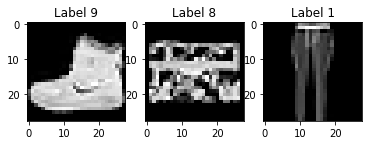

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

plt.subplot(1,3,1)
plt.imshow(x_train[0],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[0]))
plt.subplot(1,3,2)
plt.imshow(x_train[10000],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[10000]))
plt.subplot(1,3,3)
plt.imshow(x_test[6000],cmap='gray')
plt.title('Label'+ ' ' + str(y_test[6000]))

print('\n')
print(str(np.unique(y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(y_train))))

lab = ['T-Shirt/Top','Trouser/Pants','Pullover Shirt','Dress',
      'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

lab_des = pd.DataFrame(np.unique(y_train), lab)
lab_des.head(10)

In [38]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

laben = LabelEncoder()
y_train = laben.fit_transform(y_train) # This gives Label (Eg 3)
y_train = to_categorical(y_train,10) # Do One hot encoding (Eg [0,0,0,1,0....0])
y_test = laben.fit_transform(y_test) 
y_test = to_categorical(y_test,10) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [39]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))	
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 64)         

In [40]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [41]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [ ]:
history = model.fit(x_train, y_train,
                   epochs = 100,
                   validation_data=(x_test,y_test),
                   batch_size=16,
                  callbacks = callbacks
                   )
model.save('/kaggle/working/model_1.h5')

Epoch 1/100
3750/3750 [==============================] - ETA: 0s - loss: 0.6380 - accuracy: 0.7653
Epoch 00001: val_loss improved from inf to 0.41848, saving model to /kaggle/working/model.h5
3750/3750 [==============================] - 17s 5ms/step - loss: 0.6380 - accuracy: 0.7653 - val_loss: 0.4185 - val_accuracy: 0.8491
Epoch 2/100
3745/3750 [============================>.] - ETA: 0s - loss: 0.3976 - accuracy: 0.8571
Epoch 00002: val_loss improved from 0.41848 to 0.34571, saving model to /kaggle/working/model.h5
3750/3750 [==============================] - 17s 5ms/step - loss: 0.3975 - accuracy: 0.8572 - val_loss: 0.3457 - val_accuracy: 0.8742
Epoch 3/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8784
Epoch 00003: val_loss improved from 0.34571 to 0.30670, saving model to /kaggle/working/model.h5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.3393 - accuracy: 0.8783 - val_loss: 0.3067 - val_accuracy: 0.8913
Epoch 4/100
37

Epoch 29/100
3743/3750 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.9024
Epoch 00029: val_loss did not improve from 0.24845
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2919 - accuracy: 0.9025 - val_loss: 0.2751 - val_accuracy: 0.9103
Epoch 30/100
3742/3750 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.9005
Epoch 00030: val_loss did not improve from 0.24845
3750/3750 [==============================] - 17s 4ms/step - loss: 0.2977 - accuracy: 0.9005 - val_loss: 0.3399 - val_accuracy: 0.9085
Epoch 31/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8999
Epoch 00031: val_loss did not improve from 0.24845
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2970 - accuracy: 0.8999 - val_loss: 0.2918 - val_accuracy: 0.9019
Epoch 32/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.9001
Epoch 00032: val_loss did not improve from 0.

Epoch 58/100
3750/3750 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8881
Epoch 00058: val_loss did not improve from 0.24845
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3365 - accuracy: 0.8881 - val_loss: 0.3821 - val_accuracy: 0.8951
Epoch 59/100
3741/3750 [============================>.] - ETA: 0s - loss: 0.3372 - accuracy: 0.8880
Epoch 00059: val_loss did not improve from 0.24845
3750/3750 [==============================] - 17s 5ms/step - loss: 0.3373 - accuracy: 0.8881 - val_loss: 0.3485 - val_accuracy: 0.8919
Epoch 60/100
3745/3750 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8900
Epoch 00060: val_loss did not improve from 0.24845
3750/3750 [==============================] - 18s 5ms/step - loss: 0.3352 - accuracy: 0.8901 - val_loss: 0.3582 - val_accuracy: 0.8924
Epoch 61/100
3742/3750 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8875
Epoch 00061: val_loss did not improve from 0.

In [ ]:
Score = model.evaluate(x_test,y_test)
print(' Test Accuracy ', Score[1])

In [ ]:
y_test_ = np.argmax(y_test, axis=1)
y_pred_ = model.predict_classes(x_test)

In [ ]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_, target_names = lab))

In [ ]:
plt.figure(figsize=(8,8))

classes = 10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 